In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
country_net = nx.read_graphml("../networks/graphml/countries_letter_net.graphml")
city_net = nx.read_graphml("../networks/graphml/cities_letter_net.graphml")
combined_net = nx.read_graphml("../networks/graphml/combined_letter_net.graphml")

## Adjecency Matrix

In [3]:
def plot_adj_matrix(G, skips = 5, title = ''):
    # Get node labels
    node_labels = sorted_nodes = sorted(G.nodes())
    adj_matrix = nx.adjacency_matrix(G, nodelist=sorted_nodes).todense()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10), dpi=500)
    # Black and white heatmap
    sns.heatmap(adj_matrix,
                cmap='gray',        # Black and white (reversed so connections are black)
                cbar=False,
                square=True,
                linewidths=0.005,
                linecolor='black',
                ax=ax)
    # Show only every 5th label
    n_labels = len(node_labels)
    tick_positions = range(0, n_labels, skips)
    tick_labels = [node_labels[i] if i < n_labels else '' for i in tick_positions]
    # Set ticks
    ax.set_xticks([i + 0.5 for i in tick_positions])
    ax.set_yticks([i + 0.5 for i in tick_positions])
    ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=8)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=8)
    # Title and labels
    ax.set_title(f'{title} Adjacency Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show(fig)

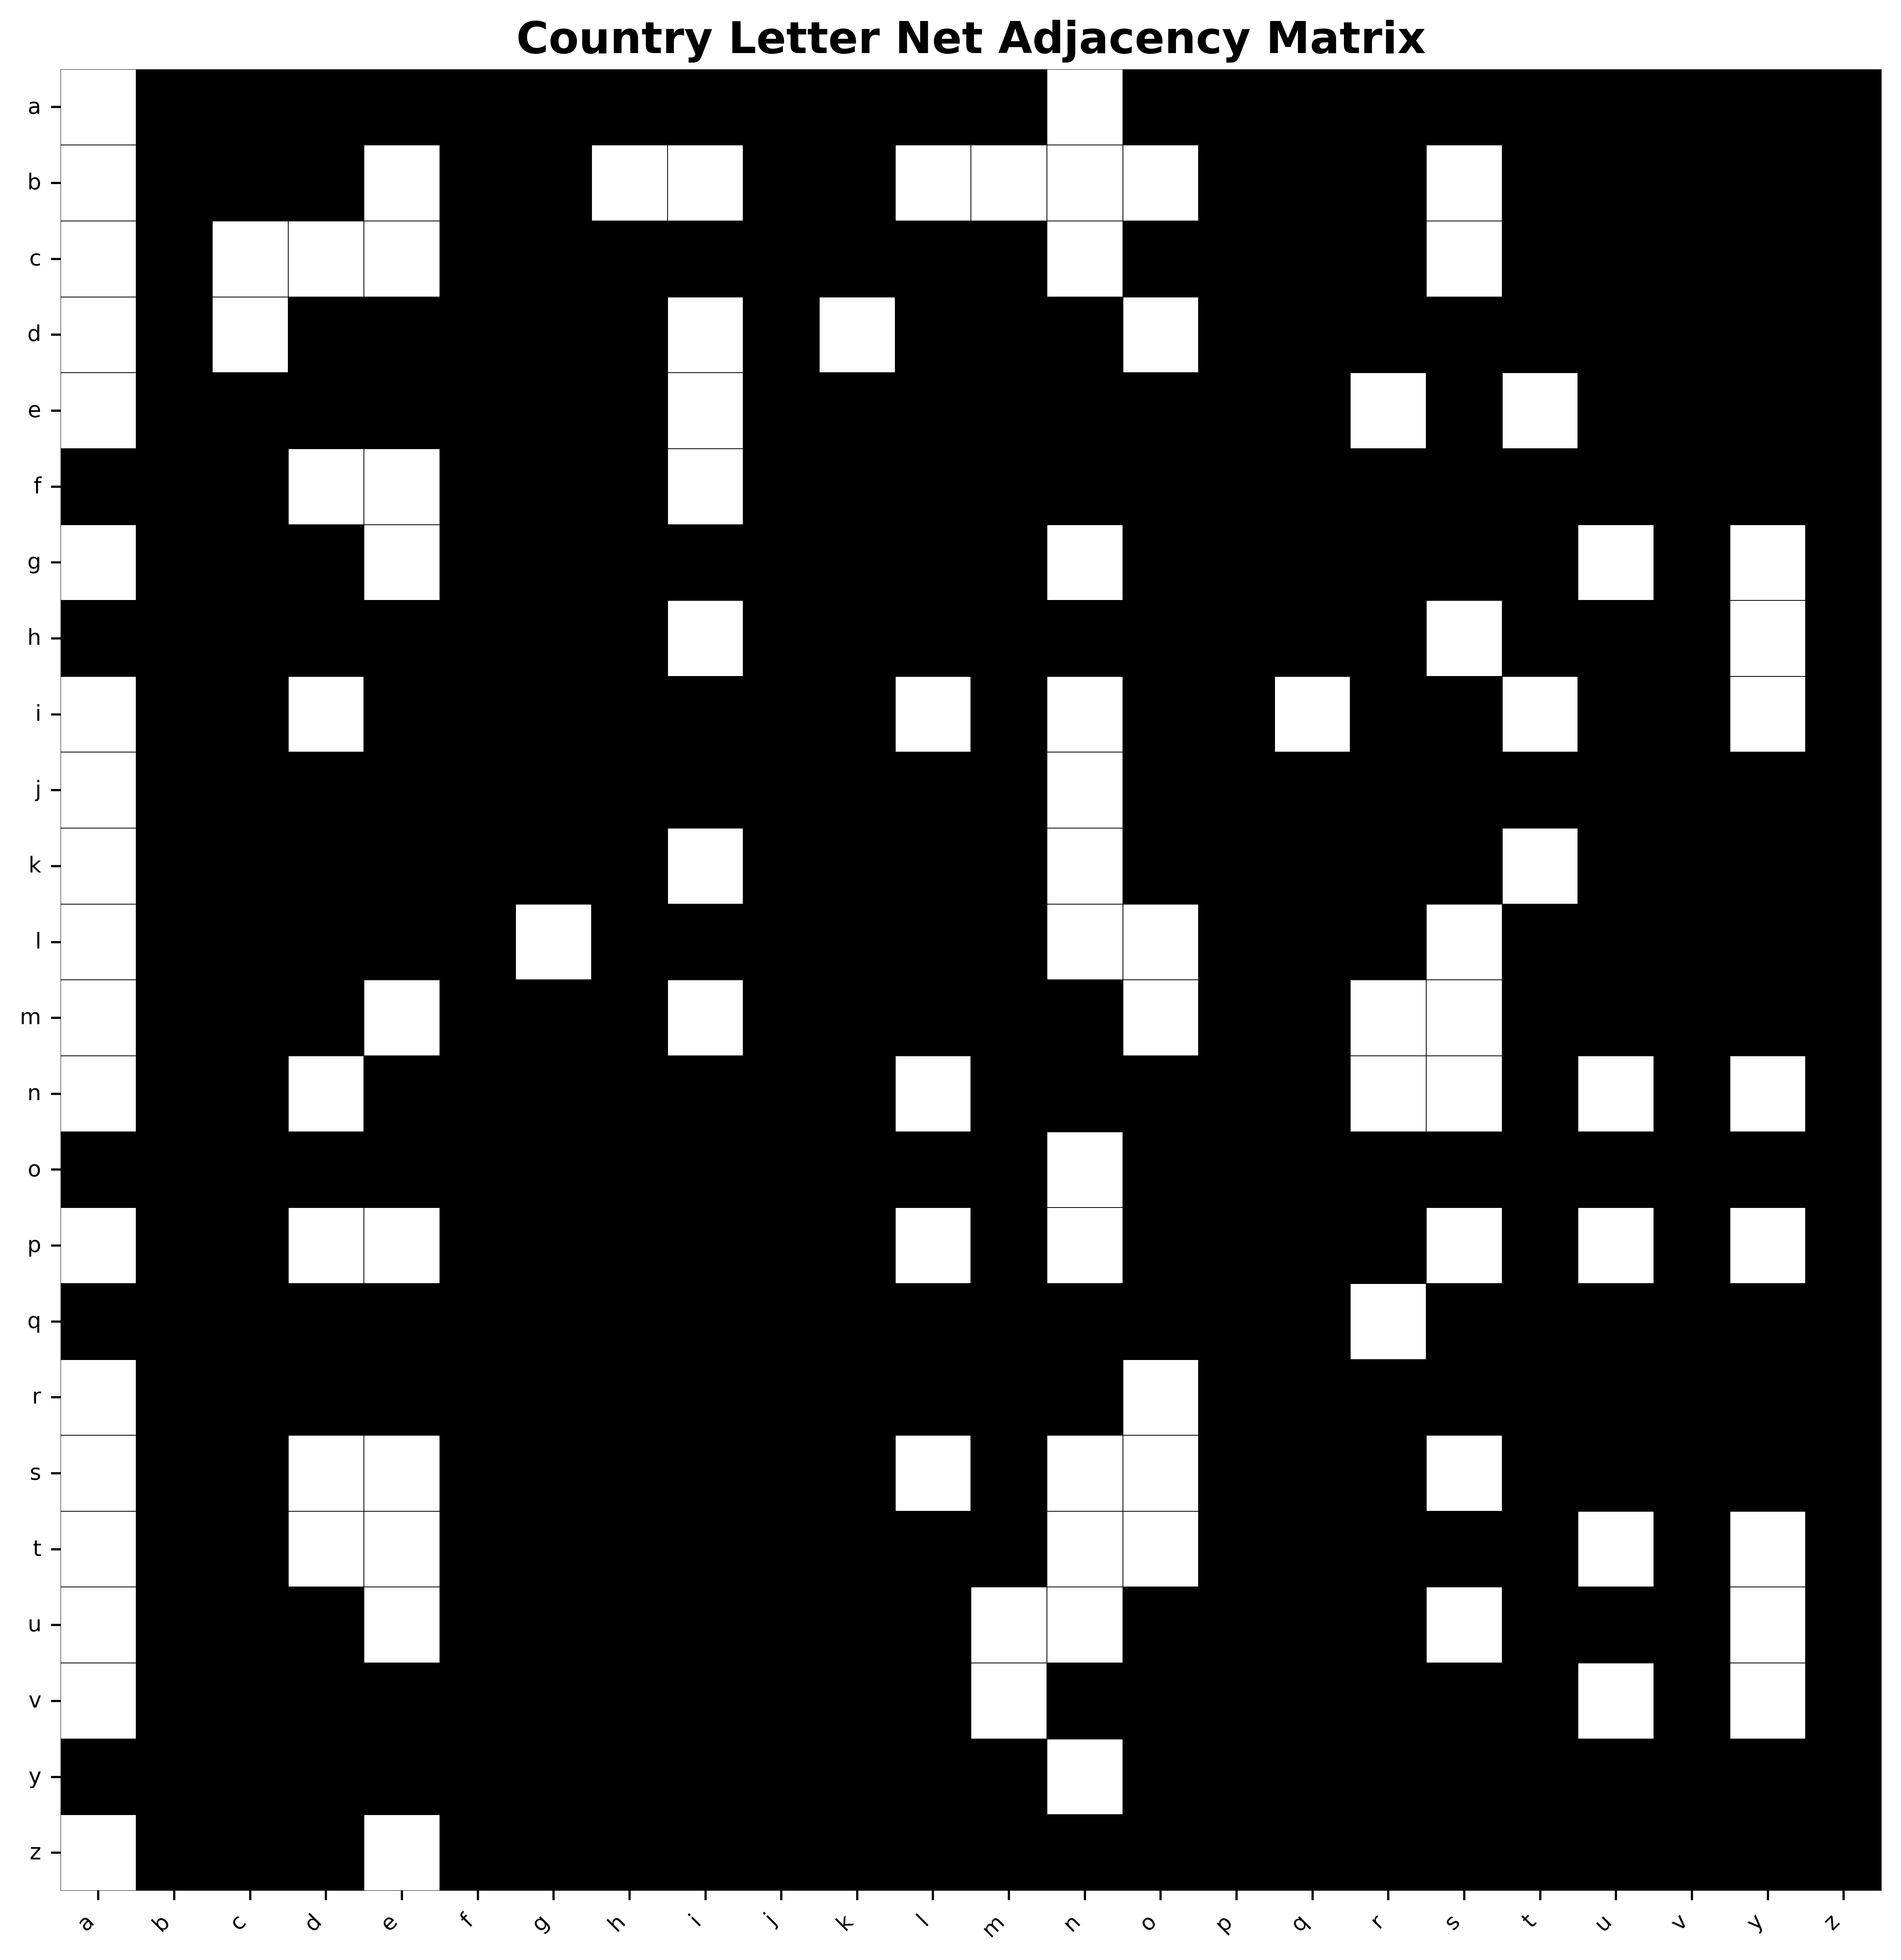

In [4]:
plot_adj_matrix(country_net, 1, 'Country Letter Net')

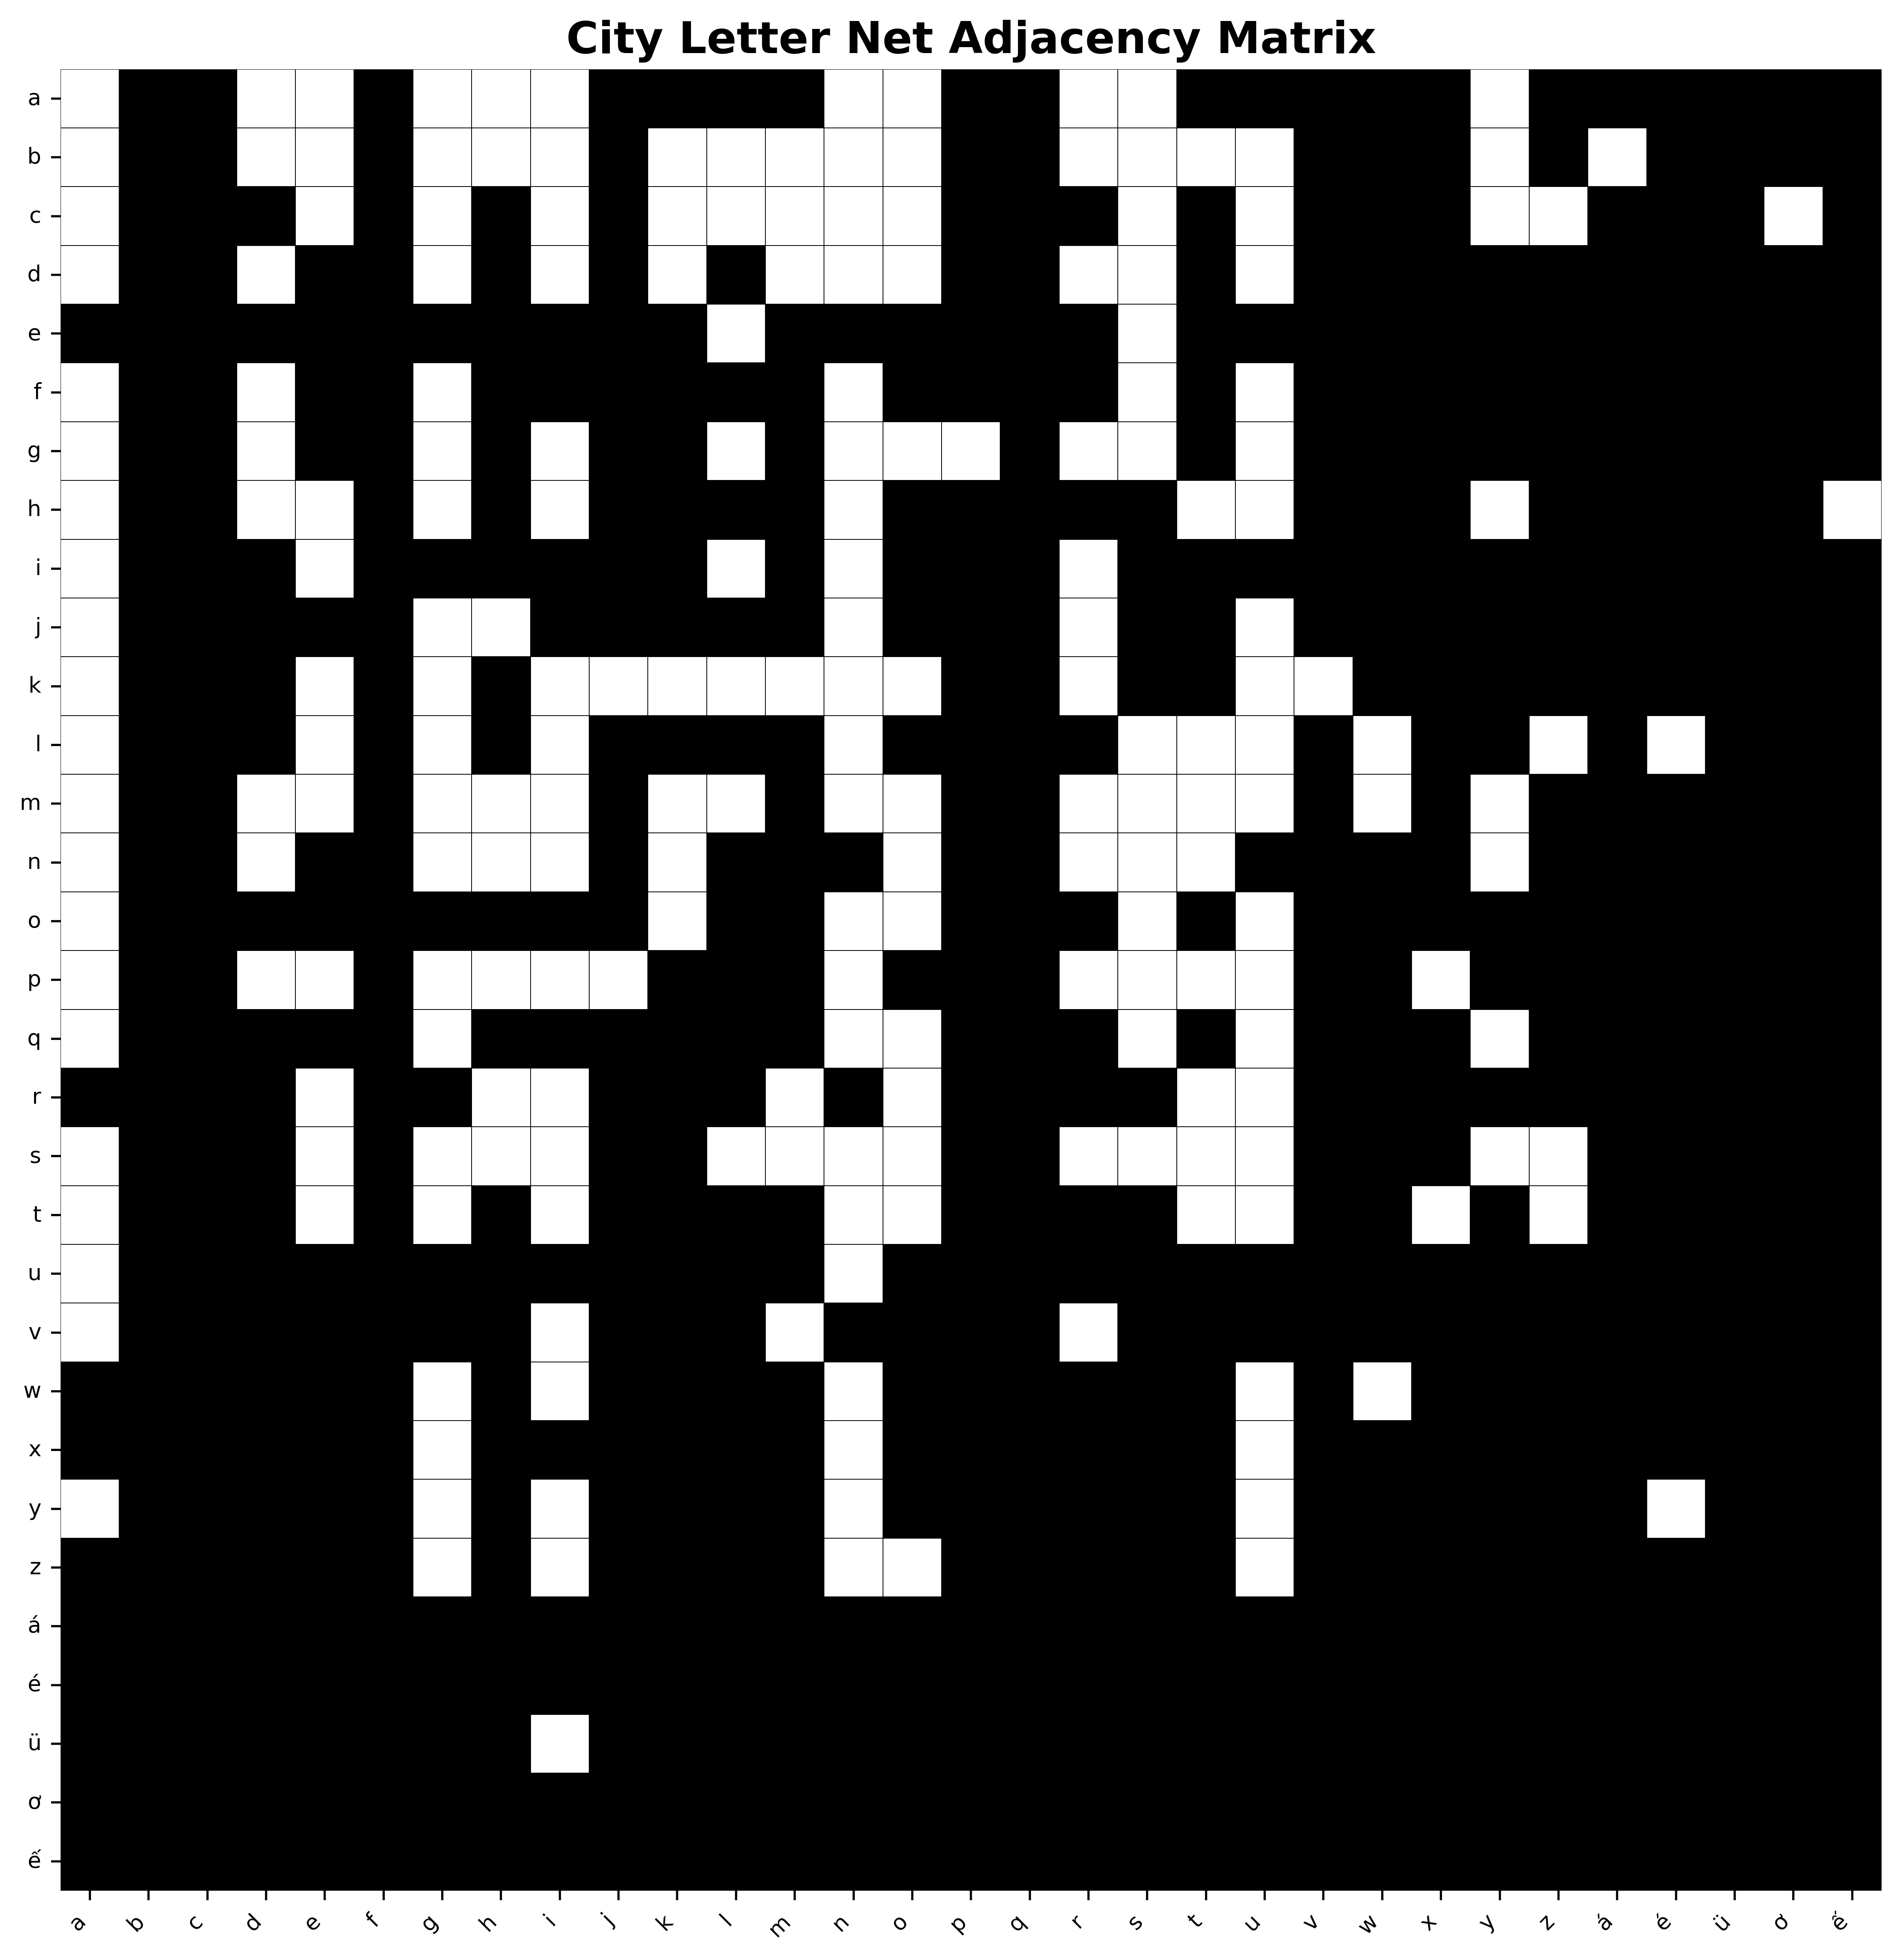

In [5]:
plot_adj_matrix(city_net, 1, "City Letter Net")

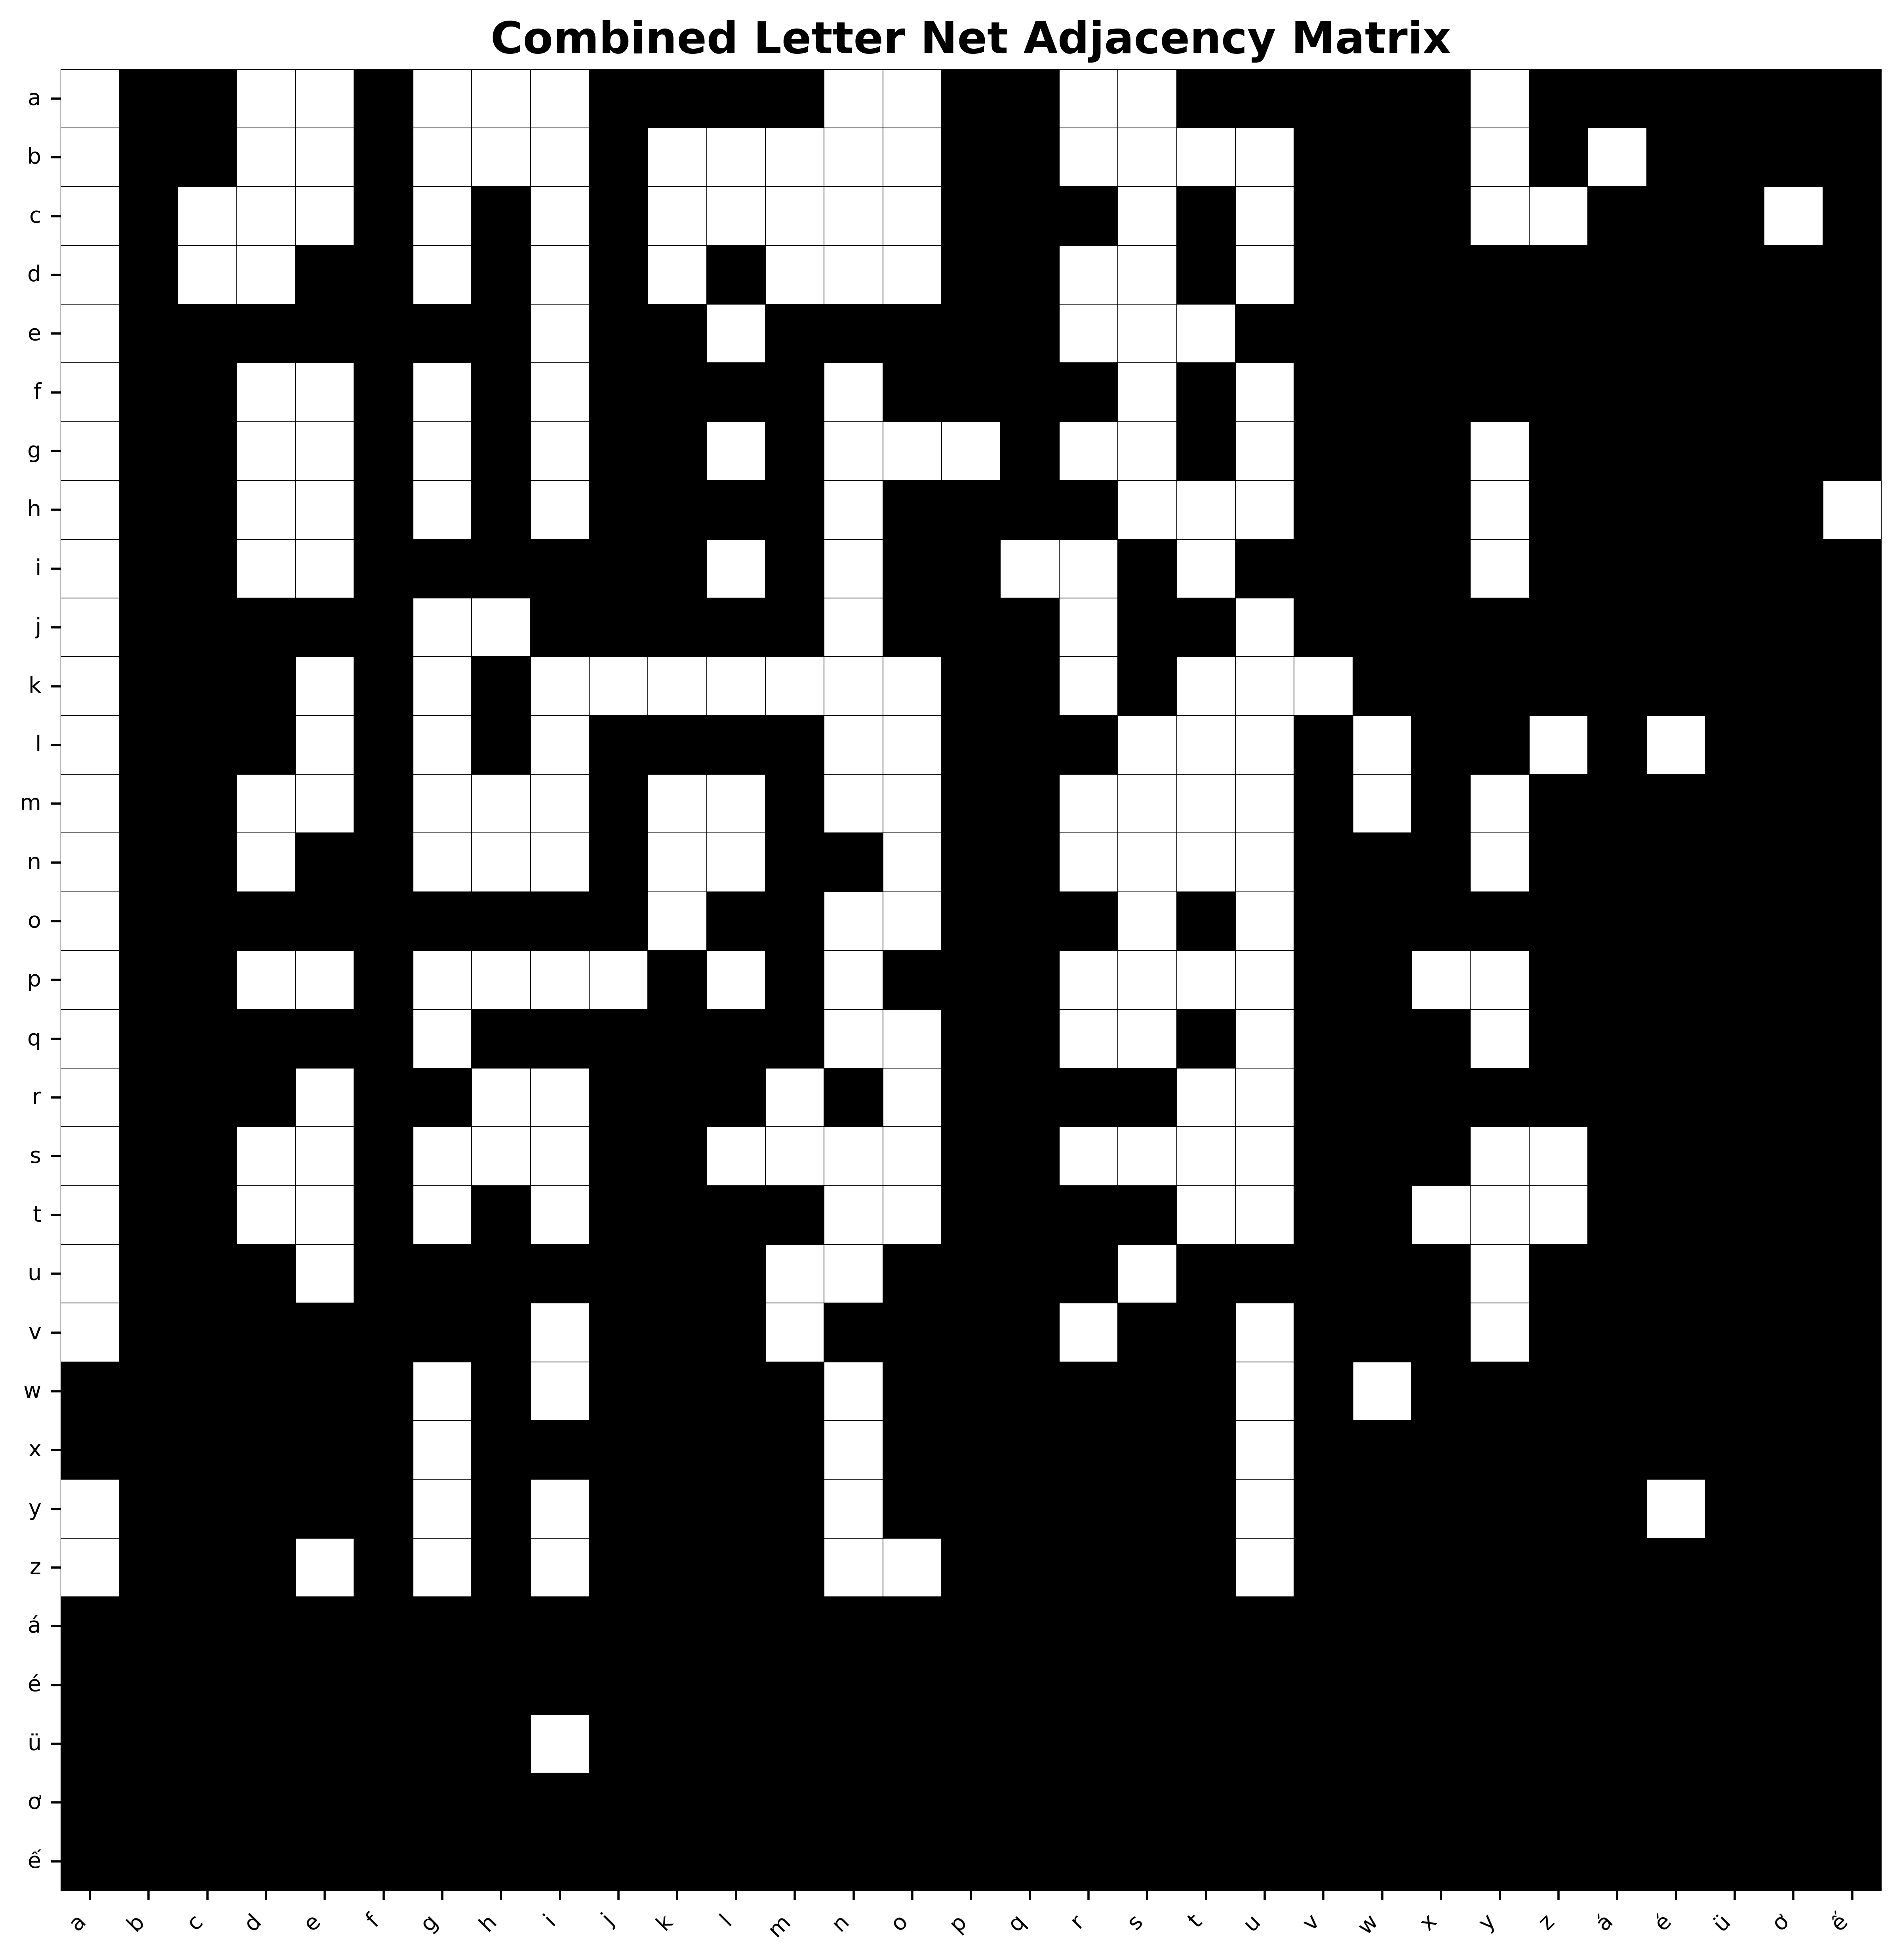

In [6]:
plot_adj_matrix(combined_net, 1, 'Combined Letter Net')

## Degree Distributions

In [7]:
country_in = pd.Series(dict(country_net.in_degree()))
country_out = pd.Series(dict(country_net.out_degree()))
country_total = country_in + country_out
country_adv = country_out - country_in

city_in = pd.Series(dict(city_net.in_degree()))
city_out = pd.Series(dict(city_net.out_degree()))
city_total = city_in + city_out
city_adv = city_out - city_in

combined_in = pd.Series(dict(combined_net.in_degree()))
combined_out = pd.Series(dict(combined_net.out_degree()))
combined_total = combined_in + combined_out
combined_adv = combined_out - combined_in

In [8]:
country_in_freq = country_in.value_counts()
country_out_freq = country_out.value_counts()
country_total_freq = country_total.value_counts()
country_adv_freq = country_adv.value_counts()

city_in_freq = city_in.value_counts()
city_out_freq = city_out.value_counts()
city_total_freq = city_total.value_counts()
city_adv_freq = city_adv.value_counts()

combined_in_freq = combined_in.value_counts()
combined_out_freq = combined_out.value_counts()
combined_total_freq = combined_total.value_counts()
combined_adv_freq = combined_adv.value_counts()

In [9]:
fig, ax = plt.subplots(3, 4, figsize=(36, 24), dpi=500)

ax[0,0].scatter(country_in_freq.keys(), country_in_freq.values)
ax[0,1].scatter(country_out_freq.keys(), country_out_freq.values)
ax[0,2].scatter(country_total_freq.keys(), country_total_freq.values)
ax[0,3].scatter(country_adv_freq.keys(), country_adv_freq.values)

ax[1,0].scatter(city_in_freq.keys(), city_in_freq.values)
ax[1,1].scatter(city_out_freq.keys(), city_out_freq.values)
ax[1,2].scatter(city_total_freq.keys(), city_total_freq.values)
ax[1,3].scatter(city_adv_freq.keys(), city_adv_freq.values)

ax[2,0].scatter(combined_in_freq.keys(), combined_in_freq.values)
ax[2,1].scatter(combined_out_freq.keys(), combined_out_freq.values)
ax[2,2].scatter(combined_total_freq.keys(), combined_total_freq.values)
ax[2,3].scatter(combined_adv_freq.keys(), combined_adv_freq.values)

ax[0,0].set_title("Country In Degree", fontsize=16, fontweight="bold")
ax[0,1].set_title("Country Out Degree", fontsize=16, fontweight="bold")
ax[0,2].set_title("Country Total Degree", fontsize=16, fontweight="bold")
ax[0,3].set_title("Country Advantage", fontsize=16, fontweight="bold")

ax[1,0].set_title("City In Degree", fontsize=16, fontweight="bold")
ax[1,1].set_title("City Out Degree", fontsize=16, fontweight="bold")
ax[1,2].set_title("City Total Degree", fontsize=16, fontweight="bold")
ax[1,3].set_title("City Advantage", fontsize=16, fontweight="bold")

ax[2,0].set_title("Combined In Degree", fontsize=16, fontweight="bold")
ax[2,1].set_title("Combined Out Degree", fontsize=16, fontweight="bold")
ax[2,2].set_title("Combined Total Degree", fontsize=16, fontweight="bold")
ax[2,3].set_title("Combined Advantage", fontsize=16, fontweight="bold")

ax[0,0].set_xlabel("Degree")
ax[0,1].set_xlabel("Degree")
ax[0,2].set_xlabel("Degree")
ax[0,3].set_xlabel("Advantage")

ax[1,0].set_xlabel("Degree")
ax[1,1].set_xlabel("Degree")
ax[1,2].set_xlabel("Degree")
ax[1,3].set_xlabel("Advantage")

ax[2,0].set_xlabel("Degree")
ax[2,1].set_xlabel("Degree")
ax[2,2].set_xlabel("Degree")
ax[2,3].set_xlabel("Advantage")

ax[0,0].set_ylabel("Frequency")
ax[0,1].set_ylabel("Frequency")
ax[0,2].set_ylabel("Frequency")
ax[0,3].set_ylabel("Frequency")

ax[1,0].set_ylabel("Frequency")
ax[1,1].set_ylabel("Frequency")
ax[1,2].set_ylabel("Frequency")
ax[1,3].set_ylabel("Frequency")

ax[2,0].set_ylabel("Frequency")
ax[2,1].set_ylabel("Frequency")
ax[2,2].set_ylabel("Frequency")
ax[2,3].set_ylabel("Frequency")

fig.suptitle("Distributions", fontsize=24, fontweight="bold", y=0.925)

plt.show()

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(36, 24), dpi=500)

for i in range(3):
    for j in range(4):
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")

ax[0,0].scatter(country_in_freq.keys(), country_in_freq.values)
ax[0,1].scatter(country_out_freq.keys(), country_out_freq.values)
ax[0,2].scatter(country_total_freq.keys(), country_total_freq.values)
ax[0,3].scatter(country_adv_freq.keys(), country_adv_freq.values)

ax[1,0].scatter(city_in_freq.keys(), city_in_freq.values)
ax[1,1].scatter(city_out_freq.keys(), city_out_freq.values)
ax[1,2].scatter(city_total_freq.keys(), city_total_freq.values)
ax[1,3].scatter(city_adv_freq.keys(), city_adv_freq.values)

ax[2,0].scatter(combined_in_freq.keys(), combined_in_freq.values)
ax[2,1].scatter(combined_out_freq.keys(), combined_out_freq.values)
ax[2,2].scatter(combined_total_freq.keys(), combined_total_freq.values)
ax[2,3].scatter(combined_adv_freq.keys(), combined_adv_freq.values)

ax[0,0].set_title("Country In Degree", fontsize=16, fontweight="bold")
ax[0,1].set_title("Country Out Degree", fontsize=16, fontweight="bold")
ax[0,2].set_title("Country Total Degree", fontsize=16, fontweight="bold")
ax[0,3].set_title("Country Advantage", fontsize=16, fontweight="bold")

ax[1,0].set_title("City In Degree", fontsize=16, fontweight="bold")
ax[1,1].set_title("City Out Degree", fontsize=16, fontweight="bold")
ax[1,2].set_title("City Total Degree", fontsize=16, fontweight="bold")
ax[1,3].set_title("City Advantage", fontsize=16, fontweight="bold")

ax[2,0].set_title("Combined In Degree", fontsize=16, fontweight="bold")
ax[2,1].set_title("Combined Out Degree", fontsize=16, fontweight="bold")
ax[2,2].set_title("Combined Total Degree", fontsize=16, fontweight="bold")
ax[2,3].set_title("Combined Advantage", fontsize=16, fontweight="bold")

ax[0,0].set_xlabel("Degree")
ax[0,1].set_xlabel("Degree")
ax[0,2].set_xlabel("Degree")
ax[0,3].set_xlabel("Advantage")

ax[1,0].set_xlabel("Degree")
ax[1,1].set_xlabel("Degree")
ax[1,2].set_xlabel("Degree")
ax[1,3].set_xlabel("Advantage")

ax[2,0].set_xlabel("Degree")
ax[2,1].set_xlabel("Degree")
ax[2,2].set_xlabel("Degree")
ax[2,3].set_xlabel("Advantage")

ax[0,0].set_ylabel("Frequency")
ax[0,1].set_ylabel("Frequency")
ax[0,2].set_ylabel("Frequency")
ax[0,3].set_ylabel("Frequency")

ax[1,0].set_ylabel("Frequency")
ax[1,1].set_ylabel("Frequency")
ax[1,2].set_ylabel("Frequency")
ax[1,3].set_ylabel("Frequency")

ax[2,0].set_ylabel("Frequency")
ax[2,1].set_ylabel("Frequency")
ax[2,2].set_ylabel("Frequency")
ax[2,3].set_ylabel("Frequency")

fig.suptitle("Log-Log Plot of Distributions", fontsize=24, fontweight="bold", y=0.925)

plt.show()

## Self - Loops

In [11]:
print("Self-loops:", list(nx.selfloop_edges(country_net)))
print("Number of self-loops:", nx.number_of_selfloops(country_net))

Self-loops: [('a', 'a'), ('s', 's'), ('c', 'c')]
Number of self-loops: 3


In [14]:
print("Self loops:", list(nx.selfloop_edges(city_net)))
print("Number of self loops:", nx.number_of_selfloops(city_net))


Self loops: [('s', 's'), ('g', 'g'), ('k', 'k'), ('a', 'a'), ('o', 'o'), ('t', 't'), ('d', 'd'), ('w', 'w')]
Number of self loops: 8


In [15]:
print("Self-loops:", list(nx.selfloop_edges(combined_net)))
print("Number of self-loops:", nx.number_of_selfloops(combined_net))

Self-loops: [('a', 'a'), ('s', 's'), ('o', 'o'), ('c', 'c'), ('d', 'd'), ('k', 'k'), ('t', 't'), ('g', 'g'), ('w', 'w')]
Number of self-loops: 9


---